# Online Food Data
For our project, we have decided to look at the data of individuals who have ordered food online, collected from a food delivery app. Online food delivery is becoming increasingly common as people opt to order out from the comfort of their own home. As this meal option becomes more popular, it begs the question of who is utilizing this service the most, and who should these food delivery companies be pandering to. This data set includes the age of the individual, their gender, marital status, education qualifications, occupation, monthly income, family size, and location given in latitude and longitude. We are interested in looking at the correlations between characteristics such as gender, marital status, or age to see who orders more food online. We will create visualizations such as bar graphs, histograms, and a Geo plot to visually see who is using this service the most. The link for our data can be found here: https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset

In [3]:
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset')

Skipping, found downloaded files in "./online-food-dataset" (use force=True to force download)


In [3]:
import os

In [4]:
data_dir = '.\online-food-dataset'

In [5]:
os.listdir(data_dir)

FileNotFoundError: [Errno 2] No such file or directory: '.\\online-food-dataset'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
food_data = pd.read_csv('onlinefoods.csv')
food_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [25]:
# 1. Which gender likes to order food online more? (Mi)
print(food_data.groupby('Gender')['Marital Status'].count())
food_gender = food_data.groupby('Gender')['Marital Status'].count().idxmax()
print("The gender likes to order food online more is", food_gender)

Gender
Female    166
Male      222
Name: Marital Status, dtype: int64
The gender likes to order food online more is Male


*Explanation: According to the data, there are 222 males order food online, 166 females order food online. Therefore, male likes to order food online more. We can focus on males' flavor when we choose partner in the future.

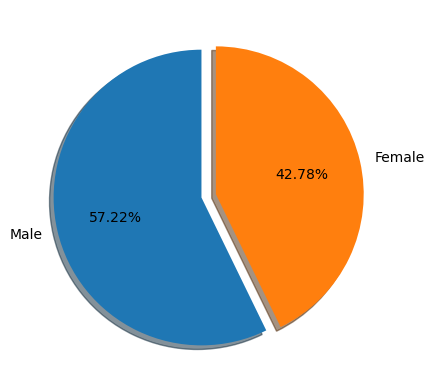

In [26]:
# 2. Create a pie chart to show the propotion of different gender about online food order. (Mi)
male = len(food_data[food_data['Gender'] == 'Male'])/len(food_data)*100
male_percent = "{:.2f}".format(male) 
female = len(food_data[food_data['Gender'] == 'Female'])/len(food_data)*100
female_percent = "{:.2f}".format(female)
labels = 'Male', 'Female'
sizes = [male_percent,female_percent]
explode = (0.1, 0) 
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

*Explanation: Male accounts for about 57.22% of online food order.

In [29]:
# 3. which marital status likes to order food online more? (Mi)
print(food_data.groupby('Marital Status')['Gender'].count())
food_marital = food_data.groupby('Marital Status')['Gender'].count().idxmax()
print(food_marital)

Marital Status
Married              108
Prefer not to say     12
Single               268
Name: Gender, dtype: int64
Single


*Explanation: According to the data, there are 268 single person order online food, 108 married person order food online, 12 peeople prefer not to say order online food. Therefore, single people like to order food online more.

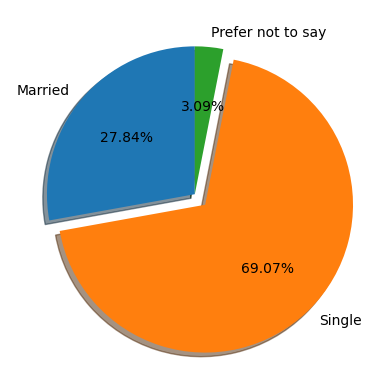

In [30]:
# 4. Create a pie chart to show the propotion of different marital status about online food order. (Mi)
married = len(food_data[food_data['Marital Status'] == 'Married'])/len(food_data)*100
married_percent = "{:.2f}".format(married)
single = len(food_data[food_data['Marital Status'] == 'Single'])/len(food_data)*100
single_percent = "{:.2f}".format(single)
other = len(food_data[food_data['Marital Status'] == 'Prefer not to say'])/len(food_data)*100
other_percent = "{:.2f}".format(other)
status = 'Married', 'Single', 'Prefer not to say'
percent = [married_percent, single_percent, other_percent]
explode = (0, 0.1, 0) 
fig, ax = plt.subplots()
ax.pie(percent, explode=explode, labels=status, autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

*Explanation: Single people account for about 69.07% of online food order.

In [31]:
# 5. Compute the quantity of family with family size 4 or more order food online. (Mi)
equals_greater4 = len(food_data[food_data['Family size'] >= 4])
equals_greater4

146

*Explanation: There are 146 families with 4 or more people order food online.

In [32]:
# 6. Compute the quantity of family with family size less than 4 (Mi)
less_4 = len(food_data[food_data['Family size'] < 4])
less_4

242

*Explanation: There are 242 families with less than 4 people order food online, therefore families with less than 4 people likes to order food online more.

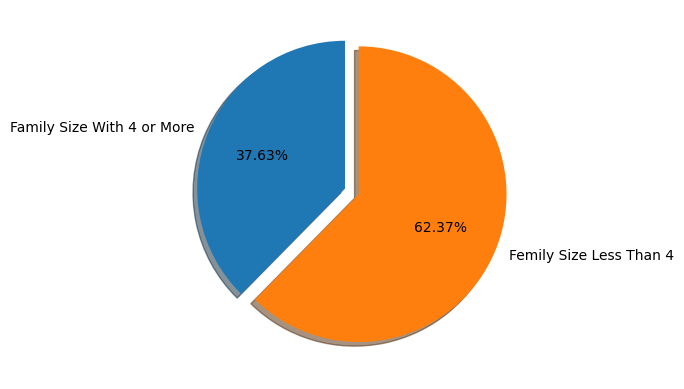

In [33]:
# 7. Create a pie chart to show the propotion of family size 4 or more and less than 4 about online food order. (Mi)
less_4_c = less_4/len(food_data)*100
less_4_percent = "{:.2f}".format(less_4_c)
equals_greater4_c = equals_greater4/len(food_data)*100
equals_greater4_percent = "{:.2f}".format(equals_greater4_c)
labels = 'Family Size With 4 or More', 'Femily Size Less Than 4'
sizes = [equals_greater4_percent, less_4_percent]
explode = (0.1, 0) 
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

* Explanation: Family size witl less than 4 accounts for 62.37% of online food order.

In [34]:
# 8. Compute the quantity of student by income order food online. (Mi)
no_income = food_data[(food_data['Occupation'] == 'Student') & (food_data['Monthly Income'] == 'No Income')]
print(len(no_income)) # output 178
below_rs10000 = food_data[(food_data['Occupation'] == 'Student') & (food_data['Monthly Income'] == 'Below Rs.10000')]
print(len(below_rs10000)) # output 17
s10001_to_25000 = food_data[(food_data['Occupation'] == 'Student') & (food_data['Monthly Income'] == '10001 to 25000')]
print(len(s10001_to_25000)) # output 7
s25001_to_50000 = food_data[(food_data['Occupation'] == 'Student') & (food_data['Monthly Income'] == '25001 to 50000')]
print(len(s25001_to_50000)) # output 3
over_50000 = food_data[(food_data['Occupation'] == 'Student') & (food_data['Monthly Income'] == 'More than 50000')]
print(len(over_50000)) # output 2

178
17
7
3
2


*Explanation: There are 178 students without income oreder food online, 17 students with below rs.10000 order food online, 7 students with income between 10001 and 25000 order food online, 3 students with income between 25001 and 50000 order food online, and 2 students with income more than 50000 order food online. From these data, students without income like to order food online more among students.

In [35]:
# 9. Compute the percentage of student by income order food online (Mi)
print(len(no_income)/len(food_data)*100) # output about 45.88 percentage
print(len(below_rs10000)/len(food_data)*100) # output about 4.38 percentage
print(len(s10001_to_25000)/len(food_data)*100) # output about 1.80 percentage
print(len(s25001_to_50000)/len(food_data)*100) # output about 0.77 percentage
print(len(over_50000)/len(food_data)*100) # output about 0.52 percentage

45.876288659793815
4.381443298969072
1.804123711340206
0.7731958762886598
0.5154639175257731


*Explanation: Students without income order food online account for about 45.88% of whole order food list, students with below rs.10000 order food online account for about 4.38% of whole order food list, students with income between 10001 and 25000 order food online account for about 1.80% of whole order food list, students with income between 25001 and 50000 order food online account for about 0.77% of whole order food list, and students with income more than 50000 order food online account for about 0.52% of whole order food list. From these data, students order food online account for over than 50% of whole order food list, especially students without income order food online accounts for the largest propotion among student.

In [96]:
#10 How do education qualifications affect income for people who have recently ordered food? (Maya)
food_data.groupby(['Educational Qualifications','Monthly Income'])['Monthly Income'].count()


Educational Qualifications  Monthly Income 
Graduate                    10001 to 25000     26
                            25001 to 50000     42
                            Below Rs.10000      9
                            More than 50000    24
                            No Income          76
Ph.D                        10001 to 25000      1
                            25001 to 50000      1
                            Below Rs.10000      2
                            More than 50000    13
                            No Income           6
Post Graduate               10001 to 25000     16
                            25001 to 50000     25
                            Below Rs.10000     14
                            More than 50000    20
                            No Income          99
School                      10001 to 25000      2
                            25001 to 50000      1
                            More than 50000     4
                            No Income           5
Uneduc

<Figure size 1000x600 with 0 Axes>

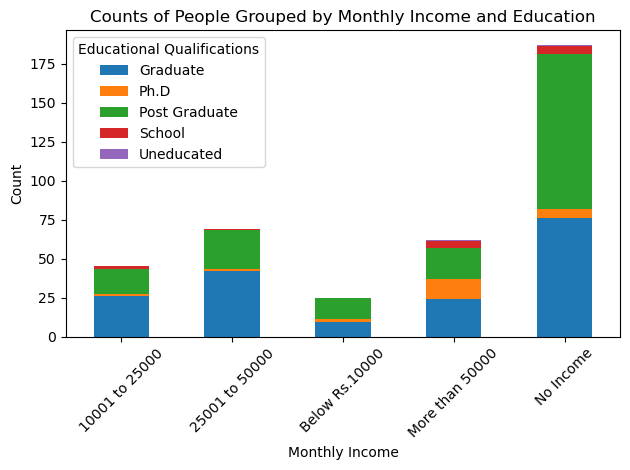

In [50]:
# Plot (Maya)
plt.figure(figsize=(10, 6))
food_data.groupby(['Monthly Income','Educational Qualifications']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Counts of People Grouped by Monthly Income and Education')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Educational Qualifications')
plt.tight_layout()
plt.show()

Explaination: As someone who only orders food during a special occasion, due to the cost, I wanted to see if there was a correlation between monthly income and food orders. Furthermore, I wanted to see if education had an effect on either income or amount of food ordered. As shown in the graph and data, surprisingly, that the monthly income range that is the most common is No Income. Further more, of that category, the majority of indivuals who have no income and still order food online are graduate and post graduate. 

In [48]:
#For young people (18-25 years old), how does their relationship status affect the amount of food they order? (Maya)
young = food_data[(food_data['Age'] >= 18 ) & (food_data['Age'] <= 25)]
young.groupby('Marital Status')['Age'].count()

Marital Status
Married               25
Prefer not to say      4
Single               240
Name: Age, dtype: int64

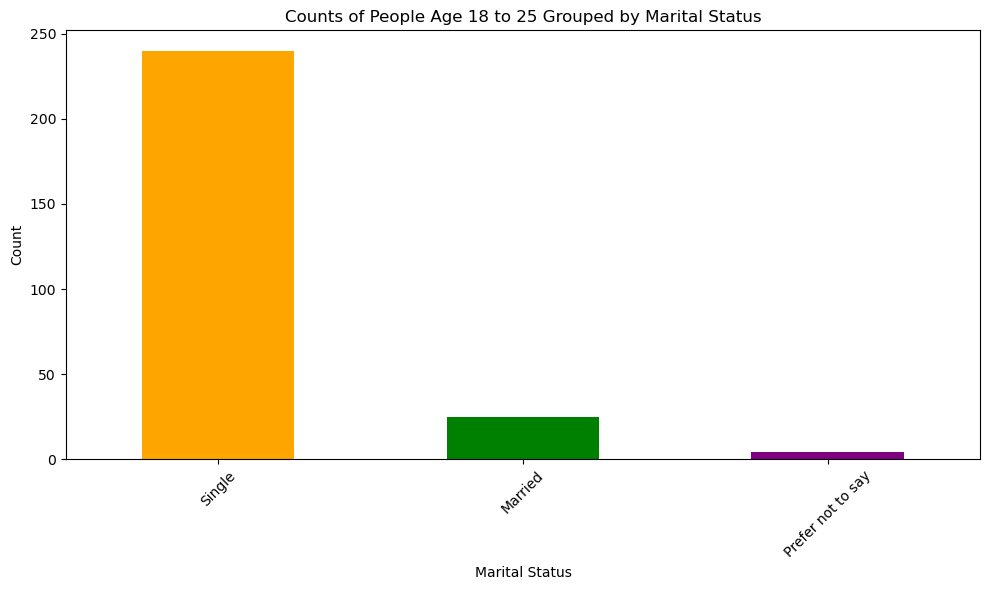

In [49]:
# plot (Maya)
plt.figure(figsize=(10, 6))
colors = ['orange', 'green', 'purple']
young['Marital Status'].value_counts().plot(kind='bar', color=colors)
plt.title('Counts of People Age 18 to 25 Grouped by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Explaination: Of the young people surveyed (18 - 25), we see that the majority of those individuals are single, and not married. This makes a lot of sense, seeing that young people are waiting longer and longer to get married.

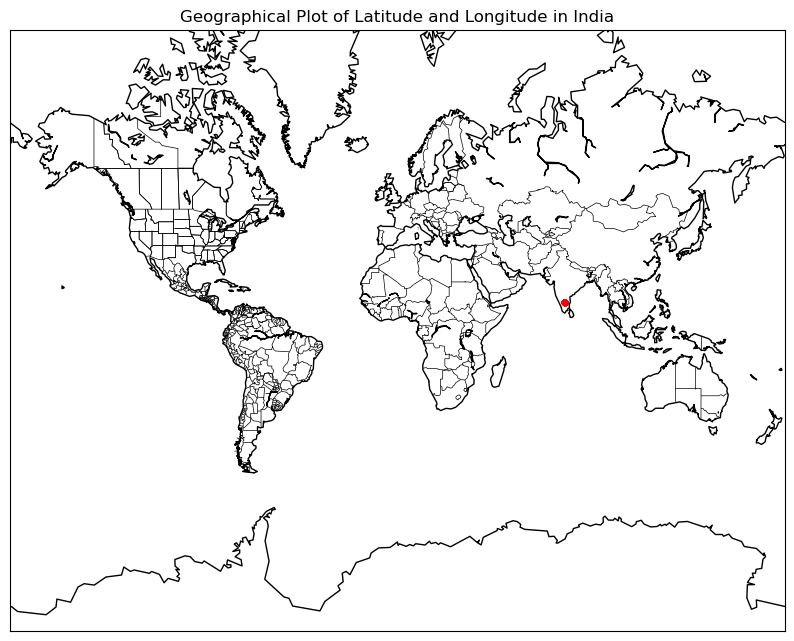

In [45]:
# How does location effect people ordering food? (Maya)
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10, 8))
m = m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

# Plot the points on the map
x, y = m(food_data['longitude'].values, food_data['latitude'].values)
m.scatter(x, y, s=10, color='red', alpha=0.5)

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Add title and show the plot
plt.title('Geographical Plot of Latitude and Longitude in India')
plt.show()

From this graph, we can see that all of the values for latiude and longitude are somewhere in India. For a more percise view of the distribution, lets zoom in. 

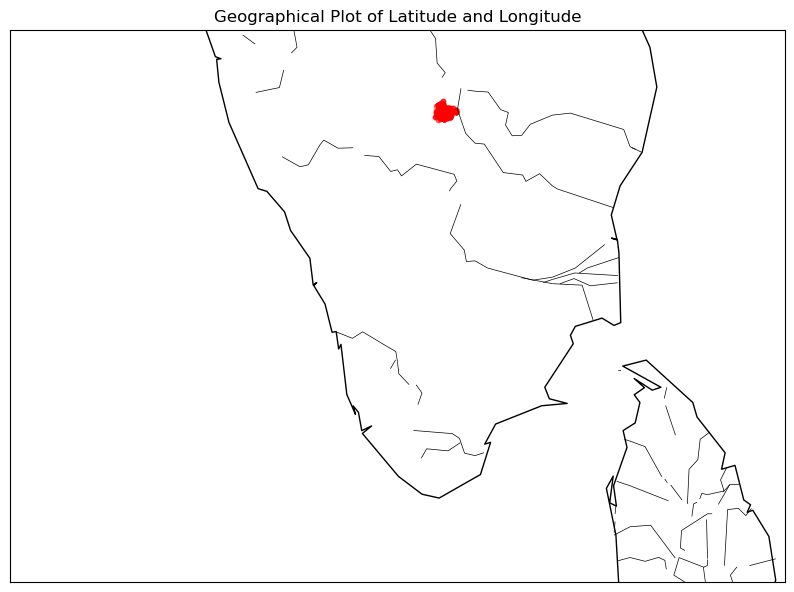

In [33]:
#Zoomed in (Maya)
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=7, urcrnrlat=14, llcrnrlon=72, urcrnrlon=82, resolution='l')

# Plot the points on the map
x, y = m(food_data['longitude'].values, food_data['latitude'].values)
m.scatter(x, y, s=10, color='red', alpha=0.5)

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawrivers()
# Add title and show the plot
plt.title('Geographical Plot of Latitude and Longitude')
plt.show()


From this graph, we can now see that the data is all centered around one city. This city is Bengaluru, which is also called Bangalore and is in India. Upon further research, Bengaluru is a southen city in India who is big in the tech industry. For this dataset, the distibution of graduate and post graduate orders makes a lot of sense, because they are in a city where the tech industry is so large. However, in order to fully see the distribution of locations across the city.

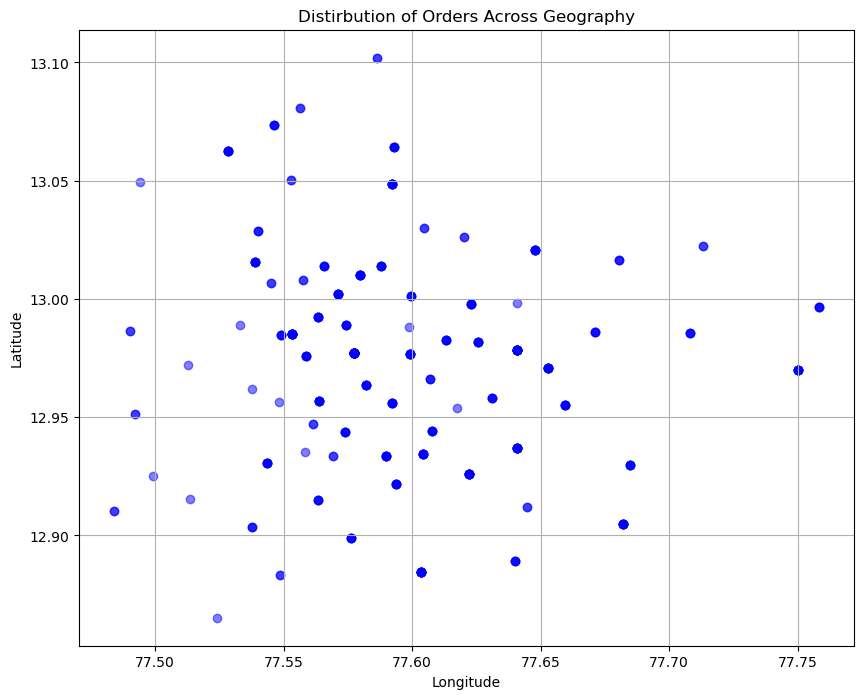

In [51]:
#Scatter (Maya)
lat= 'latitude'
long= 'longitude'

plt.figure(figsize=(10, 8))
plt.scatter(food_data[long], food_data[lat], color='blue', alpha=0.5)
plt.title('Distirbution of Orders Across Geography')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(True)
plt.show()

From this distribution, we can see that the majority of orders came between a longitude of 77.55 - 77.65, and a latitude of 12.90 - 13.05. While there is no clear pattern seen, this is logical for a city, where housing is put wherever it can be.